In [379]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)
    
def generate_XOR_easy():
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1 * i, 0.1 * i])
        labels.append(0)
        if 0.1 * i == 0.5:
            continue
        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21, 1)

def show_result(x, y, pred_y):
    plt.figure(figsize = (15, 15))
    plt.subplot(2, 2, 3)
    plt.title('Ground Truth', fontsize = 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.subplot(2, 2, 4)
    plt.title('Predict Result', fontsize = 18)
    for i in range(x.shape[0]):
        if pred_y[i] <= 0.5:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()
    
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

def ReLU(x):
    return np.where(x > 0, x, 0)

def derivative_ReLU(x):
    return np.where(x > 0, 1, 0)

def MSE(y, y_hat):
    return np.sum((y - y_hat) ** 2) / y.shape[0]

def y_grad(y, y_hat):
    return 2 * (y - y_hat) / y.shape[0]

class layer:
    def __init__(self,input_size,output_size, activate = "none"):
        self.input_size = input_size
        self.output_size = output_size
        self.activate = activate
        self.gradient = 0
        self.w = np.random.uniform(-1, 1, (input_size, output_size))
        self.b = np.random.uniform(-1, 1, (1, output_size))
        self.a = []
        self.z = []

    def forward(self, x):
        self.x = x
        self.a = np.dot(x,self.w) + self.b
        if(self.activate == "sigmoid"):
            self.z = sigmoid(self.a)
        elif(self.activate == "ReLU"):
            self.z = ReLU(self.a)
        else:
            self.z = self.a
    
    def back(self, gradient, learning_rate): 
        if self.activate == "sigmoid":
            gradient *= derivative_sigmoid(self.z)
        elif self.activate == "ReLU":
            gradient *= derivative_ReLU(self.z)

        self.w -= learning_rate * np.dot(self.x.T, gradient)
        self.b -= learning_rate * np.sum(gradient, axis = 0)
        self.gradient = np.dot(gradient, self.w.T)

class MLP:
    def __init__(self, hidden_size = 5, learning_rate = 0.5, activate = "none"):
        self.learning_rate = learning_rate
        self.hidden1 = layer(2, hidden_size, activate)
        self.hidden2 = layer(hidden_size, hidden_size, activate)
        self.output = layer(hidden_size, 1, "ReLU")
        self.loss = []

    def train(self, x, ground_truth, epoch = 100000):
        plt.figure(figsize = (30, 20))
        plt.subplot(2, 1, 1)
        plt.title('Learning Curves', fontsize = 18)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        for i in range(epoch):
            self.hidden1.forward(x)
            self.hidden2.forward(self.hidden1.z)
            self.output.forward(self.hidden2.z)

            loss, gradient = self.cost(ground_truth)
            self.loss.append(loss)
            if not i % 5000:
                print("epoch ", i, " loss : ", loss)

            self.output.back(gradient, self.learning_rate)
            self.hidden2.back(self.output.gradient, self.learning_rate)
            self.hidden1.back(self.hidden2.gradient, self.learning_rate)
        plt.plot(self.loss)
        
        show_result(x, ground_truth, self.output.z)
        for i in range(ground_truth.size):
            print("Iter", i + 1," |    Ground truth: ", ground_truth[i], " |   prediction: ", self.output.z[i], " |")
        print("loss=", loss, " accuracy=", 100 * sum((self.output.z > 0.5) == (ground_truth == 1)) / ground_truth.size, "%")
            
    def cost(self, y_hat):
        return MSE(self.output.z, y_hat), y_grad(self.output.z, y_hat)

epoch  0  loss :  0.33509595394646285
epoch  5000  loss :  0.02007677330415449
epoch  10000  loss :  0.011388205031337233
epoch  15000  loss :  0.009417041578164347
epoch  20000  loss :  0.007986945788157234
epoch  25000  loss :  0.006793598671564784
epoch  30000  loss :  0.005733011197577249
epoch  35000  loss :  0.004678128320959308
epoch  40000  loss :  0.0039051167976517126
epoch  45000  loss :  0.003413947117090528
epoch  50000  loss :  0.003021670260208155
epoch  55000  loss :  0.0026598690772214133
epoch  60000  loss :  0.0023291097034658682
epoch  65000  loss :  0.00203725305424615
epoch  70000  loss :  0.001785241706905789
epoch  75000  loss :  0.0015693250671906917
epoch  80000  loss :  0.0013844143409184927
epoch  85000  loss :  0.001226325404306182
epoch  90000  loss :  0.0010921885886047253
epoch  95000  loss :  0.0009795027677845464


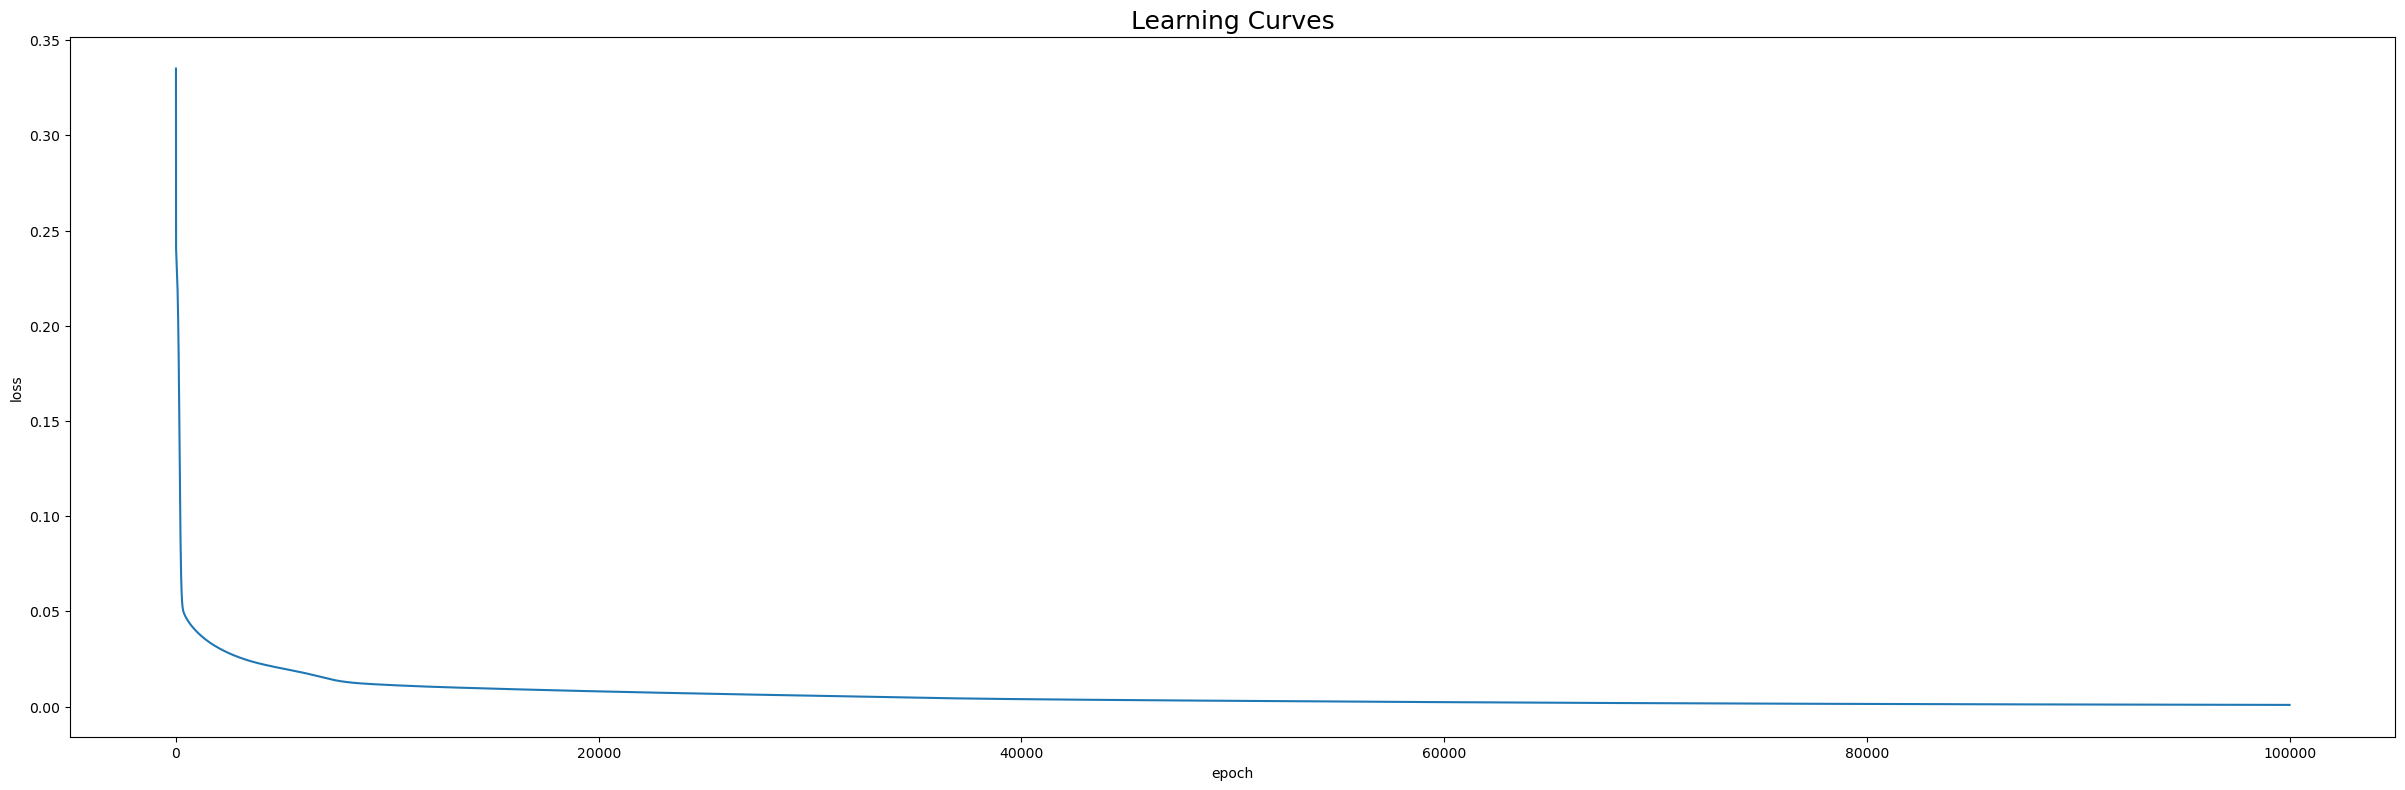

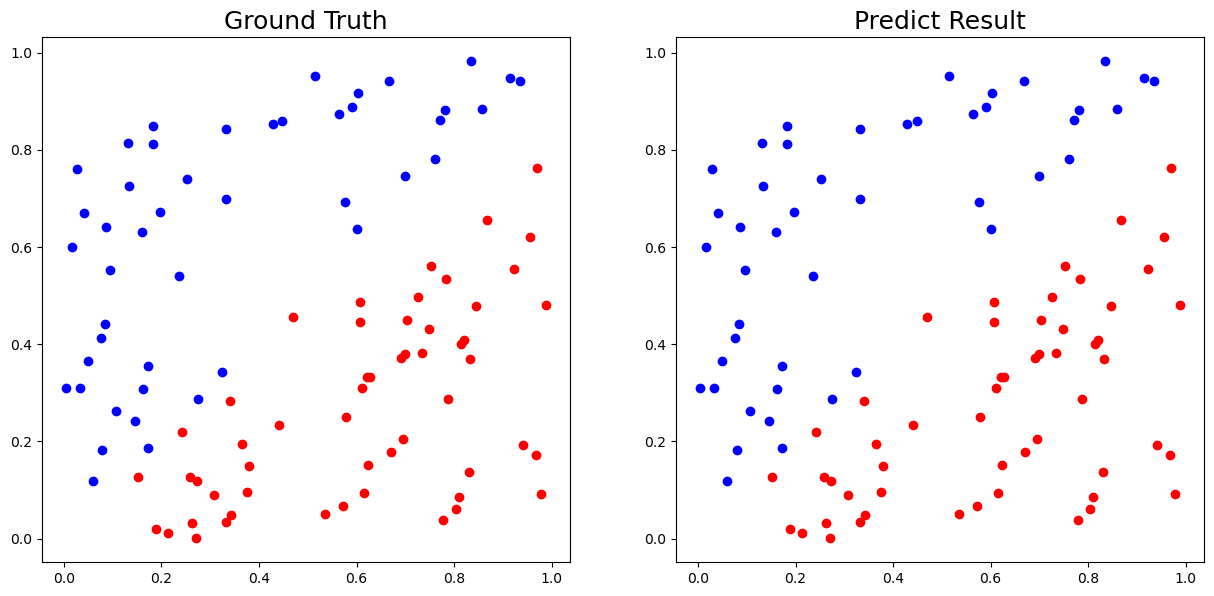

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 2  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 4  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 5  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [1.00517723]  |
Iter 7  |    Ground truth:  [1]  |   prediction:  [1.00757472]  |
Iter 8  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 10  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 11  |    Ground truth:  [1]  |   prediction:  [0.99671115]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 13  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 14  |    Ground truth:  [1]  |   prediction:  [0.89710963]  |
Iter 15  |    Ground truth:  [1]  |   prediction:  [1.00198295]  |
Iter 16  |    Ground truth:  [1]  |   prediction:  [0.99434188]  |
Iter 17  |    Gro

In [380]:
x1, y1 = generate_linear()
model = MLP(hidden_size = 5,activate = "sigmoid", learning_rate = 0.3)
model.train(x1, y1)

epoch  0  loss :  1.90565079995813
epoch  5000  loss :  0.07108060251077768
epoch  10000  loss :  0.0162464013479918
epoch  15000  loss :  0.0032934650236867277
epoch  20000  loss :  0.0009302525756523062
epoch  25000  loss :  0.0004603442420488015
epoch  30000  loss :  0.000297422852431221
epoch  35000  loss :  0.0002189516304581168
epoch  40000  loss :  0.00017332592068039694
epoch  45000  loss :  0.00014352420210802152
epoch  50000  loss :  0.00012249350297984773
epoch  55000  loss :  0.0001068224049434811
epoch  60000  loss :  9.466785660991284e-05
epoch  65000  loss :  8.494835703784463e-05
epoch  70000  loss :  7.698742451710474e-05
epoch  75000  loss :  7.033990627728665e-05
epoch  80000  loss :  6.470057190068564e-05
epoch  85000  loss :  5.985290146624615e-05
epoch  90000  loss :  5.56388682855471e-05
epoch  95000  loss :  5.194031611994296e-05


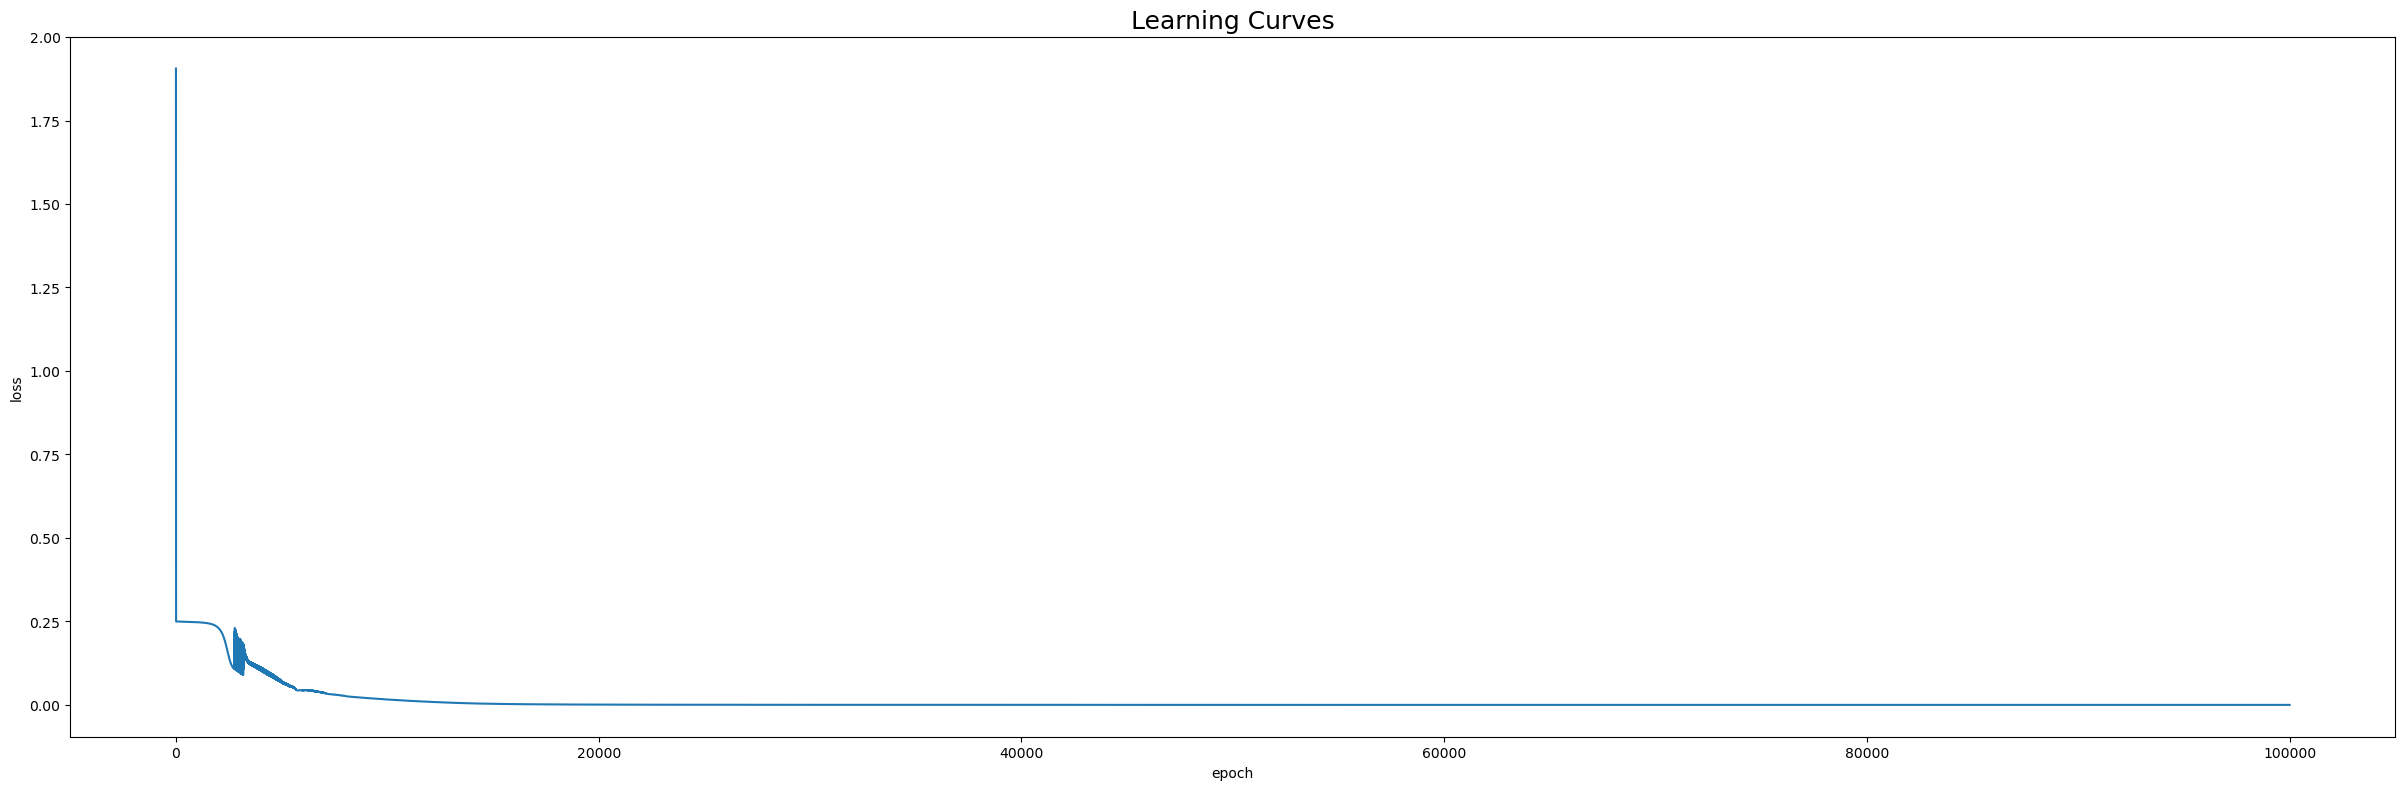

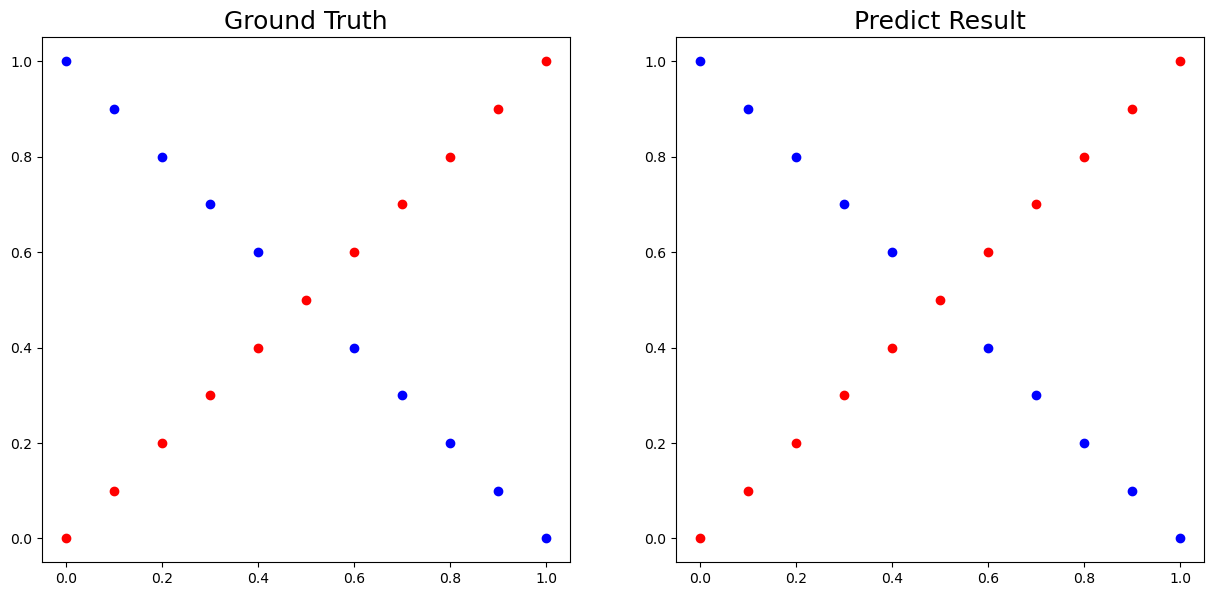

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 2  |    Ground truth:  [1]  |   prediction:  [0.98862708]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [0.99493959]  |
Iter 5  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [1.00413557]  |
Iter 7  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 8  |    Ground truth:  [1]  |   prediction:  [1.01966345]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [0.99181706]  |
Iter 11  |    Ground truth:  [0]  |   prediction:  [0.00148674]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 13  |    Ground truth:  [1]  |   prediction:  [0.99355973]  |
Iter 14  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 15  |    Ground truth:  [1]  |   prediction:  [1.01613708]  |
Iter 16  |    Ground truth:  [0]  |   prediction:  [0.]  |
I

In [383]:
x2, y2 = generate_XOR_easy()
model = MLP(hidden_size = 5,activate = "sigmoid", learning_rate = 0.2)
model.train(x2, y2)